In [1]:
import pandas as pd
from pandas import DataFrame, Series
import numpy as np

In [2]:
uc_df = pd.read_csv("./attributeData/userChoices.csv", header=None)
uc_df.columns = ['attribute', 'hit_id', 'user_id', 'font_a_name', 'font_b_name', 'user_choice']

In [3]:
uc_df

,attribute,hit_id,user_id,font_a_name,font_b_name,user_choice
0,modern,3,2,GentiumBasic-BoldItalic,AllertaStencil-Regular,more
1,modern,3,3,GentiumBasic-BoldItalic,AllertaStencil-Regular,more
2,modern,3,4,GentiumBasic-BoldItalic,AllertaStencil-Regular,more
3,modern,3,5,GentiumBasic-BoldItalic,AllertaStencil-Regular,less
4,modern,3,6,GentiumBasic-BoldItalic,AllertaStencil-Regular,less
5,modern,3,7,GentiumBasic-BoldItalic,AllertaStencil-Regular,less
6,modern,3,8,GentiumBasic-BoldItalic,AllertaStencil-Regular,more
7,modern,3,9,GentiumBasic-BoldItalic,AllertaStencil-Regular,less
8,modern,4,2,Asset,CantoraOne-Regular,less
9,modern,4,5,Asset,CantoraOne-Regular,less


In [4]:
unique_font_a_names = uc_df.font_a_name.unique()
unique_font_b_names = uc_df.font_b_name.unique()
unique_attributes = uc_df.attribute.unique()
unique_users = uc_df.user_id.unique()

number_of_unique_font_a = len(unique_font_a_names)
number_of_unique_font_b = len(unique_font_b_names)
number_of_unique_attributes = len(unique_attributes)
number_of_unique_users = len(unique_users)

print(number_of_unique_font_a)
print(number_of_unique_font_b)
print(number_of_unique_attributes)
print(number_of_unique_users)

np.array_equal(np.sort(unique_font_a_names), np.sort(unique_font_b_names))

print(uc_df.shape)

200
200
31
639
(198400, 6)


In [5]:
print(np.sort(unique_users))

[  2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19
  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37
  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55
  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73
  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91
  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109
 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127
 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145
 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163
 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181
 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199
 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217
 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235
 236 237 238 239 240 241 242 243 244 245 246 247 24

In [6]:
def get_unique_dict(unique_values):
    dict_id_to_name = dict(enumerate(unique_values))
    dict_name_to_id = dict((y,x) for x, y in dict_id_to_name.iteritems())
    return dict_id_to_name, dict_name_to_id

In [7]:
font_id_to_name_dict, font_name_to_id_dict  = get_unique_dict(unique_font_a_names)
id_to_attribute_dict, attribute_to_id_dict = get_unique_dict(unique_attributes)

In [8]:
font_name_to_id_dict

{'ARSMaquetteWebOne': 123,
 'Acme-Regular': 40,
 'AdventPro-SemiBold': 19,
 'Aldrich': 103,
 'Alegreya-BoldItalic': 175,
 'AllertaStencil-Regular': 18,
 'Amethysta-Regular': 44,
 'Andada-Bold': 70,
 'Andada-Italic': 80,
 'AndadaSC-Bold': 108,
 'AnonymousPro': 153,
 'ArchivoNarrow-Regular': 137,
 'ArialRoundedMTBold': 91,
 'ArialUnicodeMS': 167,
 'Arimo-Bold': 94,
 'Arimo-BoldItalic': 105,
 'Arizonia-Regular': 38,
 'Arvo-Bold': 9,
 'Arvo-BoldItalic': 152,
 'Arvo-Italic': 5,
 'Asap-Regular': 133,
 'Asset': 1,
 'Astloch-Bold': 32,
 'AveriaLibre-LightItalic': 99,
 'AveriaSansLibre-Italic': 45,
 'AveriaSerifLibre-Italic': 180,
 'BadScript-Regular': 65,
 'Bello-Pro': 7,
 'BenchNine-Regular': 63,
 'Bentham-Regular': 126,
 'Bevan': 90,
 'BilboSwashCaps-Regular': 43,
 'BlackOpsOne-Regular': 102,
 'BowlbyOneSC-Regular': 82,
 'Brevia-Regular': 121,
 'BubblerOne': 95,
 'Buenard-Bold': 159,
 'Cabin-SemiBoldItalic': 28,
 'CabinCondensed': 72,
 'CabinCondensed-Medium': 47,
 'Calluna-Regular': 53,
 'C

In [9]:
font_id_to_name_dict

{0: 'GentiumBasic-BoldItalic',
 1: 'Asset',
 2: 'ShareTech-Regular',
 3: 'Iceland-Regular',
 4: 'Oswald-Bold',
 5: 'Arvo-Italic',
 6: 'Roboto-MediumItalic',
 7: 'Bello-Pro',
 8: 'Syncopate-Bold',
 9: 'Arvo-Bold',
 10: 'ModernAntiqua-Regular',
 11: 'Marvel-Bold',
 12: 'PressStart2P-Regular',
 13: 'Oldenburg-Regular',
 14: 'Sevillana-Regular',
 15: 'Roboto-Black',
 16: 'Palatino-Roman',
 17: 'SourceCodePro-Black',
 18: 'AllertaStencil-Regular',
 19: 'AdventPro-SemiBold',
 20: 'FanwoodText-Italic',
 21: 'Megrim',
 22: 'LobsterTwo-Italic',
 23: 'NovaRound',
 24: 'Strait-Regular',
 25: 'Fenix',
 26: 'Slackey',
 27: 'Simonetta-Black',
 28: 'Cabin-SemiBoldItalic',
 29: 'UbuntuMono-Bold',
 30: 'GEInspira',
 31: 'OFLGoudyStMTT',
 32: 'Astloch-Bold',
 33: 'OriginalSurfer-Regular',
 34: 'GFSNeohellenic-Italic',
 35: 'FredokaOne-Regular',
 36: 'HoeflerText-Regular',
 37: 'Signika-Semibold',
 38: 'Arizonia-Regular',
 39: 'Futura-Medium',
 40: 'Acme-Regular',
 41: 'Philosopher',
 42: 'Tinos',
 43: '

In [10]:
id_to_attribute_dict

{0: 'modern',
 1: 'playful',
 2: 'clumsy',
 3: 'sharp',
 4: 'graceful',
 5: 'angular',
 6: 'strong',
 7: 'attention-grabbing',
 8: 'artistic',
 9: 'attractive',
 10: 'complex',
 11: 'calm',
 12: 'friendly',
 13: 'happy',
 14: 'legible',
 15: 'sloppy',
 16: 'warm',
 17: 'delicate',
 18: 'charming',
 19: 'formal',
 20: 'wide',
 21: 'disorderly',
 22: 'gentle',
 23: 'technical',
 24: 'boring',
 25: 'pretentious',
 26: 'bad',
 27: 'dramatic',
 28: 'thin',
 29: 'fresh',
 30: 'soft'}

In [11]:
attribute_to_id_dict

{'angular': 5,
 'artistic': 8,
 'attention-grabbing': 7,
 'attractive': 9,
 'bad': 26,
 'boring': 24,
 'calm': 11,
 'charming': 18,
 'clumsy': 2,
 'complex': 10,
 'delicate': 17,
 'disorderly': 21,
 'dramatic': 27,
 'formal': 19,
 'fresh': 29,
 'friendly': 12,
 'gentle': 22,
 'graceful': 4,
 'happy': 13,
 'legible': 14,
 'modern': 0,
 'playful': 1,
 'pretentious': 25,
 'sharp': 3,
 'sloppy': 15,
 'soft': 30,
 'strong': 6,
 'technical': 23,
 'thin': 28,
 'warm': 16,
 'wide': 20}

In [12]:
df2 = uc_df.replace({'font_a_name' : font_name_to_id_dict})
df2 = df2.replace({'font_b_name' : font_name_to_id_dict})
df2 = df2.replace({'attribute' : attribute_to_id_dict})

In [13]:
df2

,attribute,hit_id,user_id,font_a_name,font_b_name,user_choice
0,0,3,2,0,18,more
1,0,3,3,0,18,more
2,0,3,4,0,18,more
3,0,3,5,0,18,less
4,0,3,6,0,18,less
5,0,3,7,0,18,less
6,0,3,8,0,18,more
7,0,3,9,0,18,less
8,0,4,2,1,114,less
9,0,4,5,1,114,less


In [14]:
df3 = df2.loc[df2['attribute'] == 0]
print(df3.shape)
df3

(6400, 6)


,attribute,hit_id,user_id,font_a_name,font_b_name,user_choice
0,0,3,2,0,18,more
1,0,3,3,0,18,more
2,0,3,4,0,18,more
3,0,3,5,0,18,less
4,0,3,6,0,18,less
5,0,3,7,0,18,less
6,0,3,8,0,18,more
7,0,3,9,0,18,less
8,0,4,2,1,114,less
9,0,4,5,1,114,less


In [15]:
def get_weight_array(attribute_id):
    df3 = df2.loc[df2['attribute'] == attribute_id]
    number_of_samples = df3.shape[0]
    print(number_of_samples," rows with attribute", id_to_attribute_dict[attribute_id])
    samples = np.zeros((number_of_unique_font_a, number_of_samples))

    for index, row in df3.iterrows():
        font_a_index = row['font_a_name']
        font_b_index = row['font_b_name']

        samples[font_a_index, index] = 1
        samples[font_b_index, index] = -1

    y = df3['user_choice'] == 'more'
    return samples, y

In [16]:
X, y = get_weight_array(0)
print(X.shape)
print(X)

(6400, ' rows with attribute', 'modern')
(200, 6400)
[[ 1.  1.  1. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]


In [17]:
y = [int(e) for e in y]
print(y[:10])
print(len(y))

[1, 1, 1, 0, 0, 0, 1, 0, 0, 0]
6400


In [18]:
def get_user_array(attribute_id):
    df3 = df2.loc[df2['attribute'] == attribute_id]
    number_of_samples = df3.shape[0]
    samples = np.zeros((number_of_unique_users, number_of_samples))

    for index, row in df3.iterrows():
        user_index = row['user_id'] - 2
        samples[user_index, index] = 1

    return samples

In [19]:
s2 = get_user_array(0)
print(s2.shape)
print(s2)

(639, 6400)
[[ 1.  0.  0. ...,  0.  0.  0.]
 [ 0.  1.  0. ...,  0.  0.  0.]
 [ 0.  0.  1. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]


In [20]:
fonts, opinions = get_weight_array(0)
print(fonts)
print(fonts.shape)

opinions = [int(e) for e in opinions]
print(opinions[:50])
print(len(opinions))

users = get_user_array(0)
print(users)
print(users.shape)

(6400, ' rows with attribute', 'modern')
[[ 1.  1.  1. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]
(200, 6400)
[1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1]
6400
[[ 1.  0.  0. ...,  0.  0.  0.]
 [ 0.  1.  0. ...,  0.  0.  0.]
 [ 0.  0.  1. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]
(639, 6400)


In [22]:
all_weights = fonts
all_y = np.asarray(opinions)
all_users = users

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model, datasets

In [24]:
w = np.ones(number_of_unique_font_a)
u = np.ones(number_of_unique_users)

logreg1 = linear_model.LogisticRegression(C=1e5)
logreg2 = linear_model.LogisticRegression(C=1e5)
Y = all_y

for i in range(1):
    t2 = u.dot(all_users)
    X = np.multiply(t2, all_weights).T
    logreg1.fit(X, Y)
    new_w = logreg1.coef_
    w = new_w
    
    t1 = w.dot(all_weights)
    U = np.multiply(t1, all_users).T
    logreg2.fit(U, Y)
    new_u = logreg2.coef_
    u = new_u
    
    u = new_u
    w = new_w

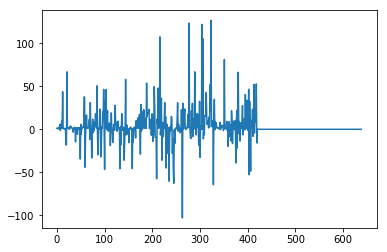

In [28]:
plt.plot(u.flatten())
plt.show()

In [29]:
w

array([[ 1.07981654, -0.77717764,  0.08152469,  0.26295388, -0.5415266 ,
         0.12132724, -0.37171204,  0.84370665, -0.50361741, -0.28739795,
         0.3727799 , -0.03429894, -1.16324265,  0.28852486,  1.19932405,
        -0.74311302, -0.23407403, -0.38004808,  0.63210232, -0.27864221,
         0.22575567,  1.07342439,  0.78822847, -0.35411031, -0.64610612,
        -0.67457021,  0.09251526,  0.69831972,  0.30125735,  0.15065064,
        -0.43827608,  0.03589398,  0.73156846,  0.61452232,  0.12455462,
        -0.08933713,  0.24279063,  0.0150635 ,  0.86414578, -0.31263925,
        -0.27472437,  0.02242124, -0.9316103 ,  1.2740206 , -0.47520779,
        -0.48950685,  0.69443192, -0.74771506, -0.49314654,  0.85451571,
         0.3608664 , -0.08743837, -0.0055235 , -0.44147041, -1.09158805,
         0.50068655, -1.2098884 ,  0.32117609,  0.77355205, -0.41903043,
        -1.09178366,  0.48583062,  0.7490204 , -1.12608025,  0.94514411,
         0.57933343,  0.07324383,  1.13644042,  0.0

In [30]:
import pickle
f1 = open("u","wb")
pickle.dump(u, f1)
f1.close()

f2 = open("w","wb")
pickle.dump(w, f2)
f2.close()

In [31]:
print(u.max(), u.min())
print(w.max(), w.min())

(126.98170480598776, -103.19126122818848)
(1.787403408634646, -1.4192898768649476)


In [32]:
def change_range(range1, min_dest, max_dest):
    min_r = range1.min()
    max_r = range1.max()
    
    return [float(max_dest - min_dest) / float(max_r - min_r) * (e - min_r) + min_dest for e in range1]

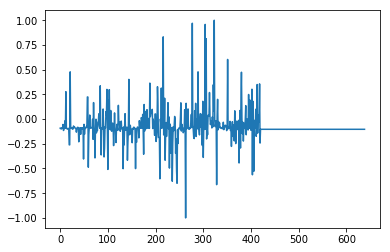

In [33]:
u_transformed = change_range(u.flatten(), -1.0, 1.0)
plt.plot(u_transformed)
plt.show()

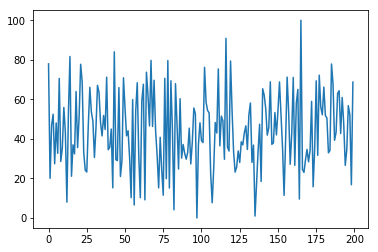

In [34]:
w_transformed = change_range(w.flatten(), 0, 100)
plt.plot(w_transformed)
plt.show()

In [35]:
print(w_transformed[:20])

[77.934064637910026, 20.024123828040146, 46.802560447372812, 52.460388526483563, 27.372847984346247, 48.043794100864218, 32.668476411192856, 70.571031514788757, 28.555037359220115, 35.29779194361528, 55.885287947327818, 43.190627148047433, 7.9847743509945746, 53.257813842148032, 81.660879159901867, 21.086421212625538, 36.96068629263101, 32.408518782336124, 63.972198698457554, 35.5708379115732]


In [1]:
def get_final_pair(w1):
    retVal = []
    for item in range(len(w1)):
        retVal.append((font_id_to_name_dict[item], w1[item]))
    return retVal

In [37]:
pairs = get_final_pair()
sorted_pairs = sorted(pairs, key=lambda x: x[0])

In [38]:
for pair in sorted_pairs:
    print(pair[1])

25.7683203442
35.6930147181
35.5708379116
58.4835900336
69.3690434946
63.9721986985
29.4409849108
44.0400833457
69.3777750175
25.0869876901
35.3017874575
33.693723732
33.2406627844
23.009654406
38.3634934363
53.1157193729
71.2084210815
35.2977919436
52.3565606238
48.0437941009
28.1096932071
20.024123828
67.0740275811
48.1356861432
28.9950719881
66.2199721043
62.3266128187
70.5710315148
9.143675511
38.4900574374
29.7142722264
83.9902739752
76.1822545782
4.08056942113
33.2403898657
55.6021982281
42.5306489883
53.6548734858
15.2015607953
20.942907688
30.4930775484
58.9435581411
49.1405592819
65.9159331024
28.0357942738
46.5443238353
59.4107489817
72.2071453667
46.2885047918
71.2419552915
33.866897479
68.7867829376
68.3832761456
68.8558747526
33.8275181545
51.3003706798
23.2239131376
52.170300122
23.160914198
41.4742736916
54.2760348116
34.5106477108
30.5926919922
11.4110992033
48.1444390764
26.5919439289
34.8783288367
77.9340646379
36.4400343646
34.580358716
51.4965307914
35.7905849684
73

In [2]:
def estimate_attribute(attribute_id):
    X, opinions = get_weight_array(attribute_id)
    Y = np.asarray([int(e) for e in opinions])
    U = get_user_array(attribute_id)

    w = np.ones(number_of_unique_font_a)
    u = np.ones(number_of_unique_users)

    logreg1 = linear_model.LogisticRegression(C=1e5)
    logreg2 = linear_model.LogisticRegression(C=1e5)

    t2 = u.dot(U)
    X = np.multiply(t2, X).T
    logreg1.fit(X, Y)
    w = logreg1.coef_

    t1 = w.dot(all_weights)
    U = np.multiply(t1, all_users).T
    logreg2.fit(U, Y)
    new_u = logreg2.coef_
    u = new_u
    
    u = new_u
    w = new_w

    u_transformed = change_range(u.flatten(), -1.0, 1.0)
    w_transformed = change_range(w.flatten(), 0, 100)
    
    pairs = get_final_pair(w_transformed)
    sorted_pairs = sorted(pairs, key=lambda x: x[0])